In [1]:
import pandas as pd

df = pd.read_csv("../data/Heart_Disease_Selected_Features.csv")
df.head()

,ca_0.0,thalach,thal_3.0,oldpeak,age,cp_4,thal_7.0,trestbps,target
0,1.0,0.017494,0.0,1.068965,0.936181,0.0,0.0,0.750380,0
1,0.0,-1.816334,1.0,0.381773,1.378929,1.0,0.0,1.596266,1
2,0.0,-0.899420,0.0,1.326662,1.378929,1.0,1.0,-0.659431,1
3,1.0,1.633010,1.0,2.099753,-1.941680,0.0,0.0,-0.095506,0
4,1.0,0.978071,1.0,0.295874,-1.498933,0.0,0.0,-0.095506,0


In [2]:
X=df.drop("target",axis=1)

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

C:\Users\Michael\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Michael\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Michael\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Michael\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak o

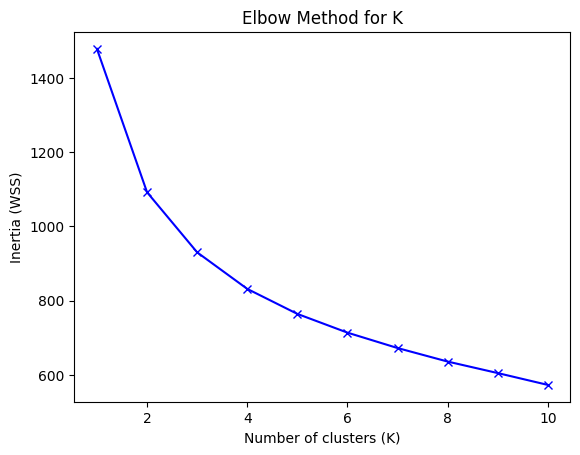

In [9]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia (WSS)")
plt.title("Elbow Method for K")
plt.show()

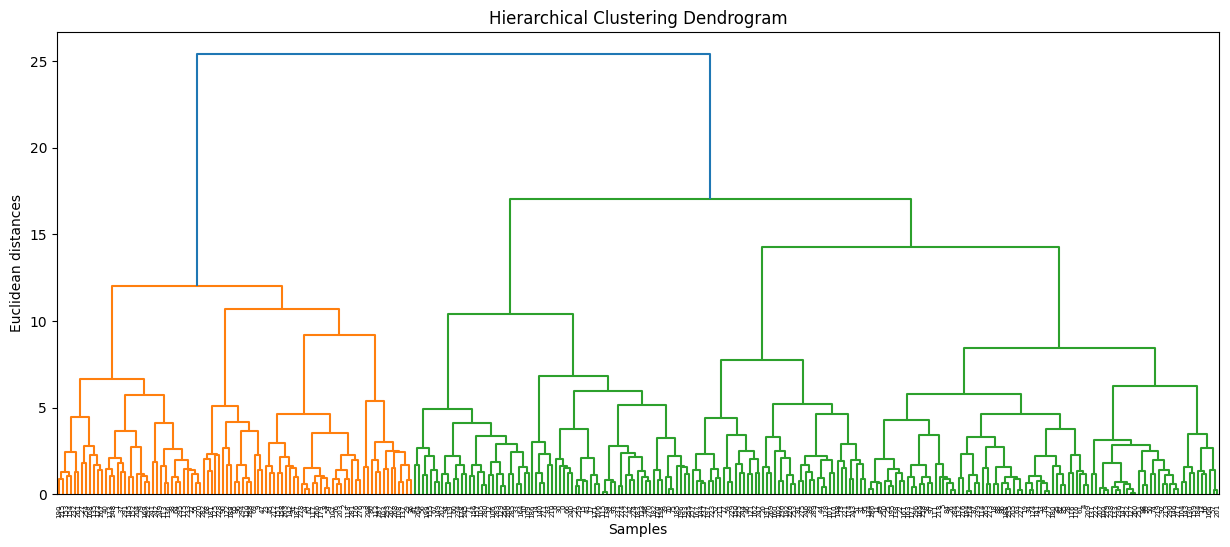

In [12]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15, 6))   
dendrogram = sch.dendrogram(sch.linkage(X, method="ward"))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Euclidean distances")
plt.show()

In [16]:
from sklearn.metrics import adjusted_rand_score, confusion_matrix

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)

print("ARI (Adjusted Rand Index):", adjusted_rand_score(df["target"], clusters))
print("Confusion Matrix:\n", confusion_matrix(df["target"], clusters))

C:\Users\Michael\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Michael\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


ARI (Adjusted Rand Index): 0.22923219082105012
Confusion Matrix:
 [[ 41 119]
 [101  36]]
